In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import fastf1 as ff
from fastf1 import plotting

In [5]:
plotting.setup_mpl()

ff.Cache.enable_cache('/Users/amos/downloads/streamlitapp/')

In [6]:
race = ff.get_session(2022, 'Zandvoort', 'R')

utils          INFO 	NumExpr defaulting to 8 threads.


In [7]:
laps = race.load_laps(with_telemetry=True)

/Users/amos/opt/anaconda3/lib/python3.8/site-packages/fastf1/core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Dutch Grand Prix - Race [v2.3.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_s

In [11]:
# Get drivers 
VER = laps.pick_driver('VER')
LEC = laps.pick_driver('LEC')

# Get fastest lap
fastest_VER = VER.pick_fastest()
fastest_LEC = LEC.pick_fastest()

# Get telemetry of fastest lap
tele_VER = fastest_VER.get_car_data().add_distance()
tele_LEC = fastest_LEC.get_car_data().add_distance()

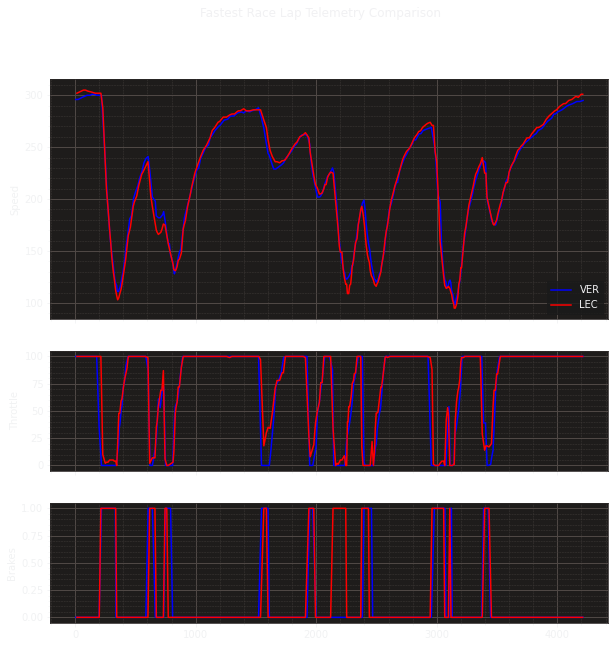

In [19]:
fig, ax = plt.subplots(3, figsize=(10,10), gridspec_kw={'height_ratios': [2,1,1]})
fig.suptitle("Fastest Race Lap Telemetry Comparison")

ax[0].plot(tele_VER['Distance'], tele_VER['Speed'], label='VER',color='blue')
ax[0].plot(tele_LEC['Distance'], tele_LEC['Speed'], label='LEC',color='red')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")

ax[1].plot(tele_VER['Distance'], tele_VER['Throttle'], label='VER',color='blue')
ax[1].plot(tele_LEC['Distance'], tele_LEC['Throttle'], label='LEC',color='red')
ax[1].set(ylabel='Throttle')

ax[2].plot(tele_VER['Distance'], tele_VER['Brake'], label='VER',color='blue')
ax[2].plot(tele_LEC['Distance'], tele_LEC['Brake'], label='LEC',color='red')
ax[2].set(ylabel='Brakes')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
plt.show()

In [20]:
tele_LEC

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2022-09-04 14:26:08.258,10782,302,8,100,False,1,car,0 days 00:00:00.181000,0 days 02:25:07.962000,15.183889
1,2022-09-04 14:26:08.698,10787,304,8,100,False,1,car,0 days 00:00:00.621000,0 days 02:25:08.402000,52.339444
2,2022-09-04 14:26:08.898,10839,305,8,100,False,1,car,0 days 00:00:00.821000,0 days 02:25:08.602000,69.283889
3,2022-09-04 14:26:09.098,10837,305,8,100,False,1,car,0 days 00:00:01.021000,0 days 02:25:08.802000,86.228333
4,2022-09-04 14:26:09.338,10858,304,8,100,False,1,car,0 days 00:00:01.261000,0 days 02:25:09.042000,106.495000
...,...,...,...,...,...,...,...,...,...,...,...
271,2022-09-04 14:27:21.259,10566,296,8,100,False,1,car,0 days 00:01:13.182000,0 days 02:26:20.963000,4121.042222
272,2022-09-04 14:27:21.658,10628,299,8,100,False,1,car,0 days 00:01:13.581000,0 days 02:26:21.362000,4154.181389
273,2022-09-04 14:27:21.898,10671,298,8,100,False,1,car,0 days 00:01:13.821000,0 days 02:26:21.602000,4174.048056
274,2022-09-04 14:27:22.178,10738,301,8,100,False,1,car,0 days 00:01:14.101000,0 days 02:26:21.882000,4197.459167
